## India Air Pollution Analysis 

**First of all this notebook SHAMELESSLY copied from here** [Shubhankar Rawat](https://towardsdatascience.com/india-air-pollution-data-analysis-bd7dbfe93841).

The motive of this notebook is not to replicate this results but find some more insight from it. To increase the feature space for this project I have included some data like Census, Auto registration to see the correlation among them. Please feel free to edit this notebook and create a pull request. We need more brains to solve this complex problem. 

In [10]:
import sys

In [11]:
sys.version

'3.7.4 (default, Aug 13 2019, 20:35:49) \n[GCC 7.3.0]'

In [2]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
plt.rcParams["figure.figsize"] = [10, 5]

In [3]:
# Name of files 
air_pollution_file_name = './data/air_pollution_data.csv'

In [4]:
air_pollution_data = pd.read_csv(air_pollution_file_name)

In [5]:
air_pollution_data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [6]:
# Peek of data for initial evaluation 
air_pollution_data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [12]:
print(f"There are total {air_pollution_data.shape[0]} rows and {air_pollution_data.shape[1]} columns in the dataset")

There are total 435742 rows and 13 columns in the dataset


### Information about data 

There are total 10 columns in the data set, we don't need all of them for the analysis so I will drop some of them. The information about the columns are given below. 

- stn_code                    -> Station code of the area **(Not required)**
- sampling_date               -> Date of sampling **(Maybe imporatant)**
- state                       -> State information **(Important)**
- location                    -> City name **(Important)**
- agency                      -> Name of agency which collected data **(Not so important)**
- type                        -> Residential, Rural or Industrial **(Important)**
- so2                         -> Sulpher-Di-Oxide, poisonous gas **(Important)**
- no2                         -> Nitrogen-Di-Oxide, poisonous gas **(Important)**
- rspm                        -> Fraction for Total Suspended Particulate Matter **(Important)**
- spm                         -> Suspended Particulate Matter **(Important)**
- location_monitoring_station -> Location of station **(Important)**
- pm2_5                       -> 2.5 Particulate Matter **(Important)**
- date                        -> Date of Mesurement **(Important)**


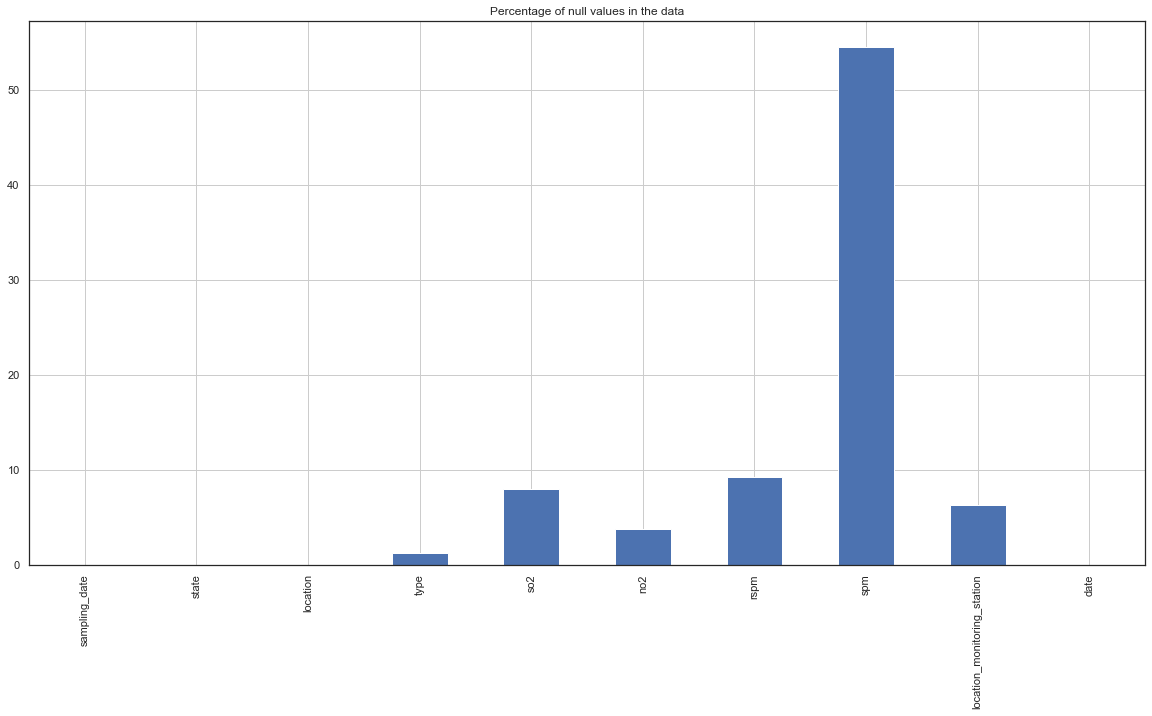

In [29]:
(air_pollution_data.isnull().sum()/air_pollution_data.shape[0]*100).plot(kind='bar', 
                                                                         title="Percentage of null values in the data",
                                                                        grid= True)

In [14]:
# Dropping these values because either they server no real purpose the data is missing 
drop_values = ['stn_code', 'agency', 'pm2_5']
air_pollution_data = air_pollution_data.drop(drop_values, axis=1)

In [15]:
# Let's take our bad boys in consideration 
pollutant_values = ['so2', 'no2', 'rspm', 'spm']

In [16]:
group_of_pollutant_by_state = air_pollution_data.groupby(['state']).median()

In [17]:
plt.rcParams["figure.figsize"] = [20, 10]

In [18]:
group_of_pollutant_by_state  = group_of_pollutant_by_state.reset_index()

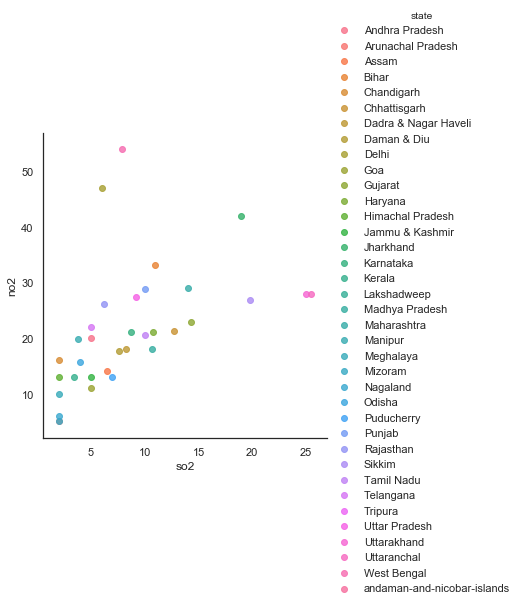

In [19]:
sns.lmplot(x='so2', y='no2', data=group_of_pollutant_by_state, hue='state', fit_reg=False)

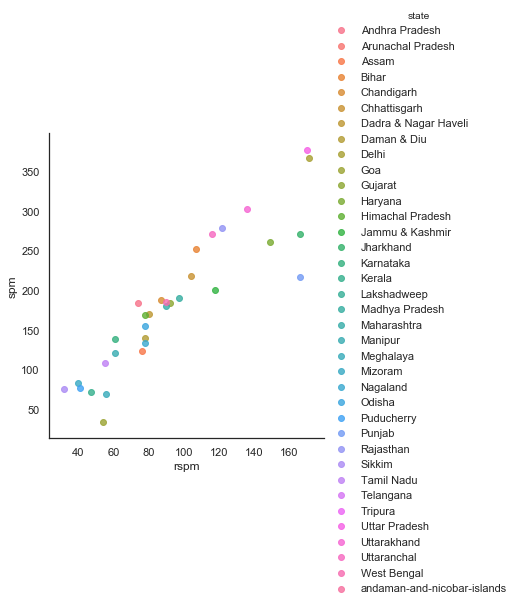

In [14]:
sns.lmplot(x='rspm', y='spm', data=group_of_pollutant_by_state, hue='state', fit_reg=False)

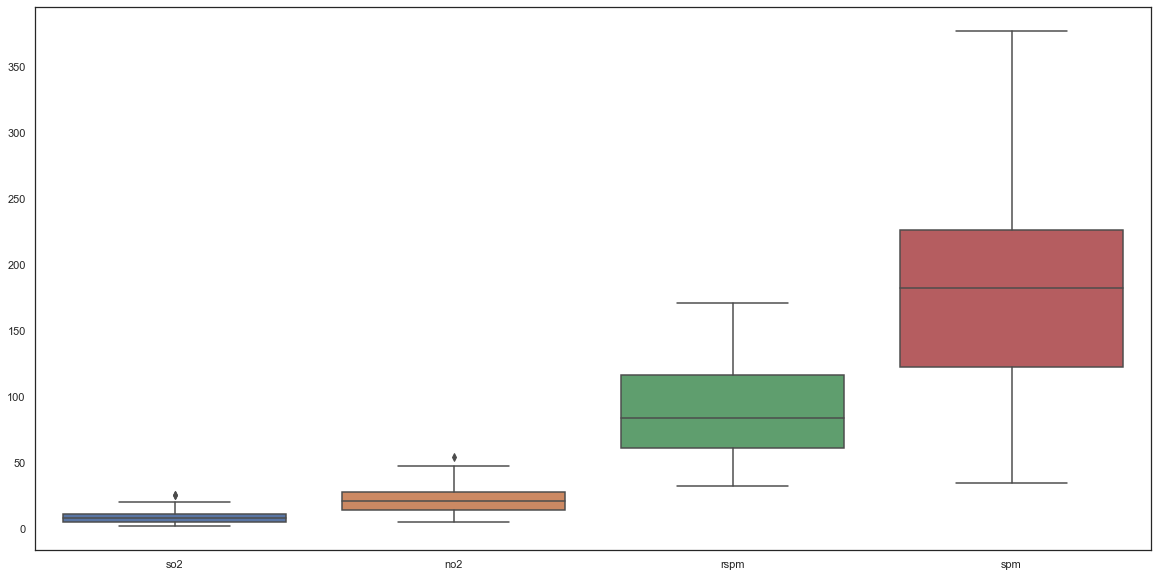

In [15]:
sns.boxplot(data=group_of_pollutant_by_state[pollutant_values].dropna())

In [16]:
group_of_pollutant_by_state.iloc[:10, :]

,state,so2,no2,rspm,spm
0,Andhra Pradesh,5.0,20.00,74.0,184.0
1,Arunachal Pradesh,2.0,5.00,74.0,NaN
2,Assam,6.5,14.00,76.0,123.0
3,Bihar,11.0,33.10,107.0,252.0
4,Chandigarh,2.0,16.00,87.0,187.0
5,Chhattisgarh,12.7,21.25,104.0,218.0
6,Dadra & Nagar Haveli,8.3,18.00,80.0,170.0
7,Daman & Diu,7.6,17.60,78.0,140.0
8,Delhi,6.0,47.00,171.0,366.0
9,Goa,5.0,11.00,54.0,34.0


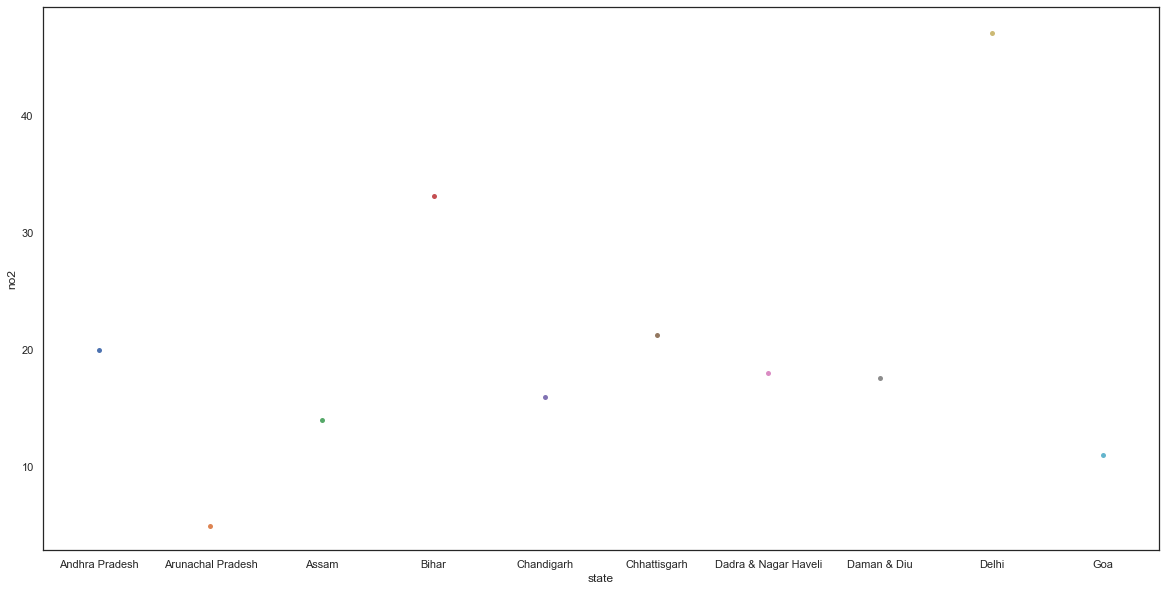

In [17]:
sns.swarmplot(x='state', y='no2', data=group_of_pollutant_by_state.iloc[:10,:])

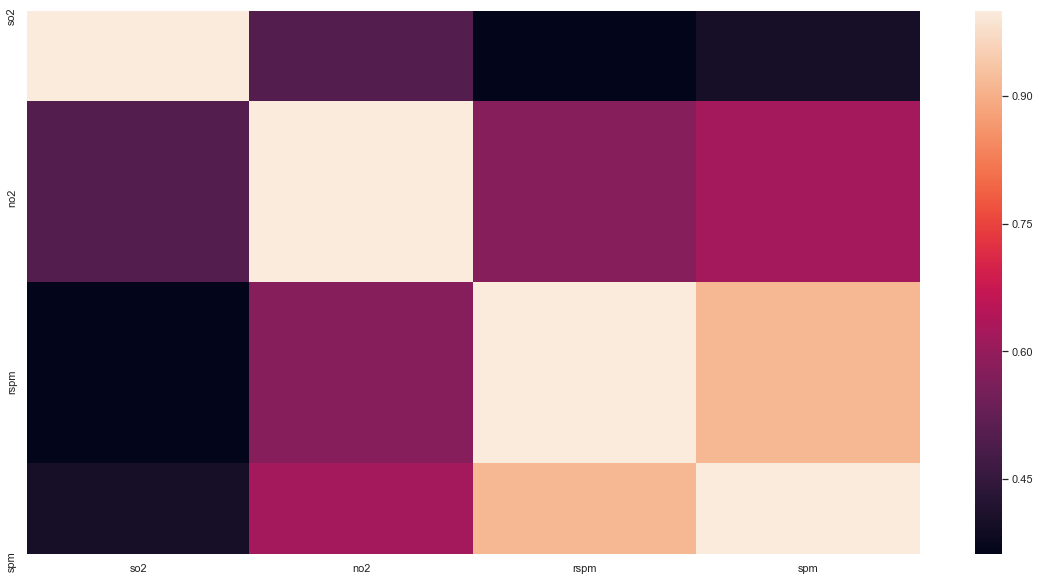

In [18]:
sns.heatmap(group_of_pollutant_by_state.corr())

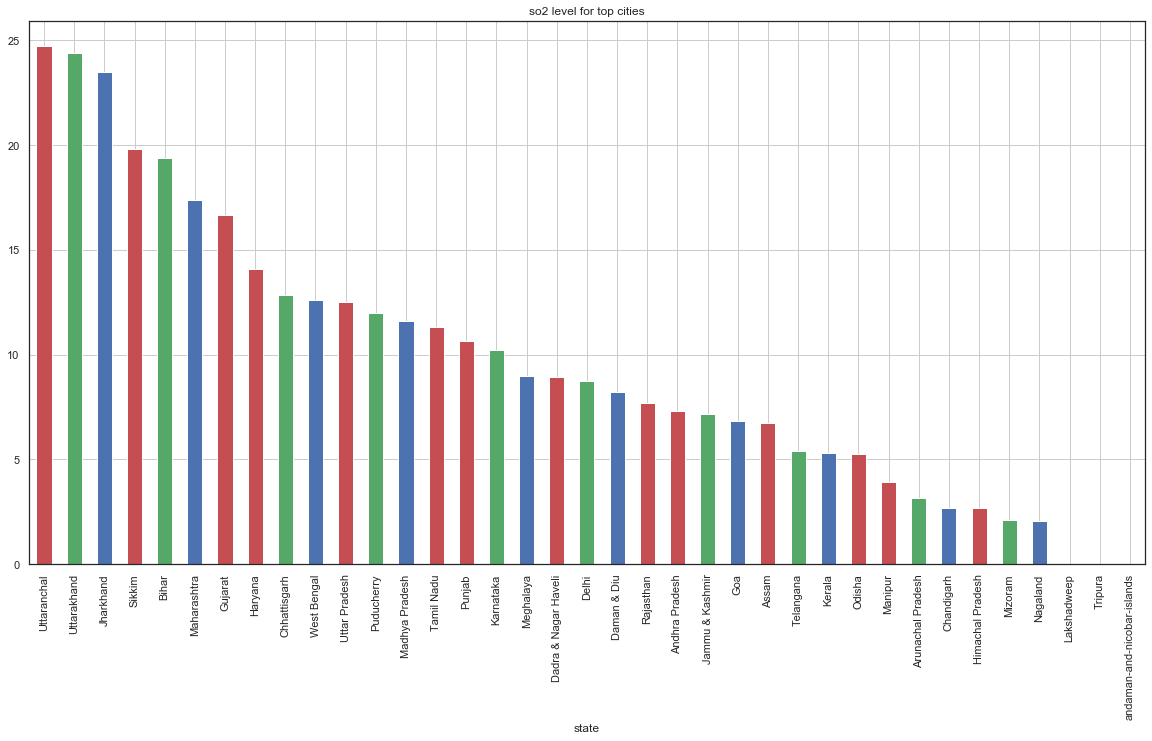

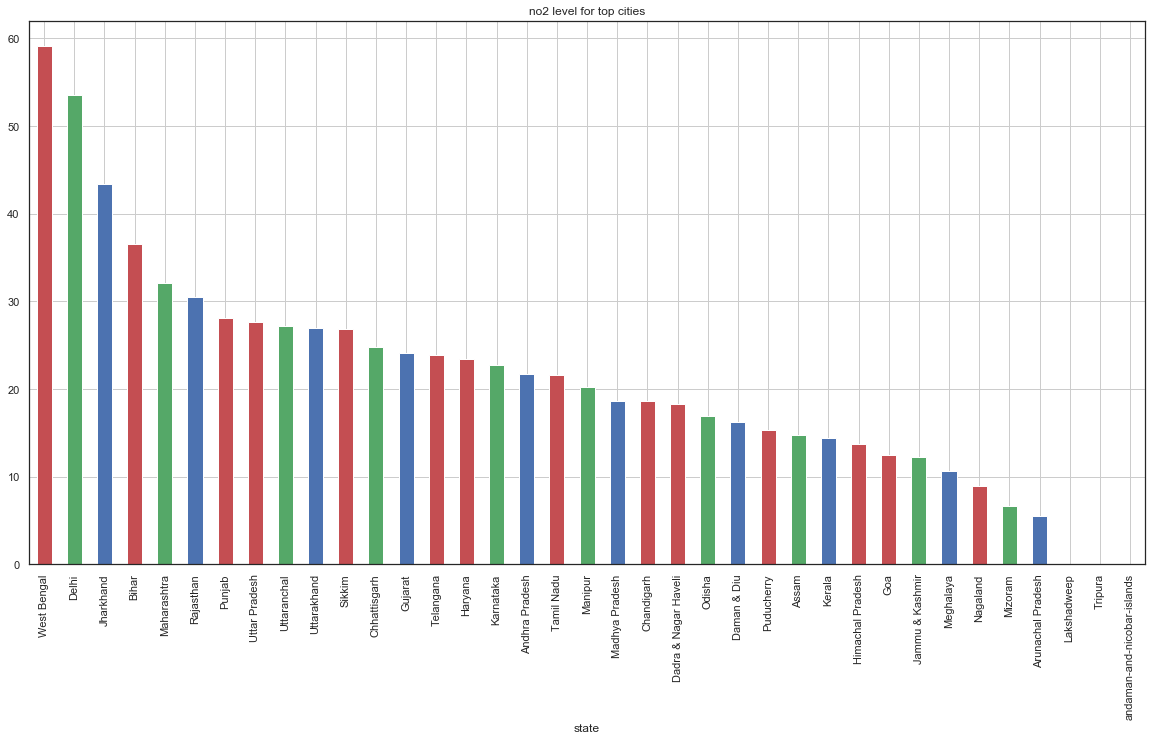

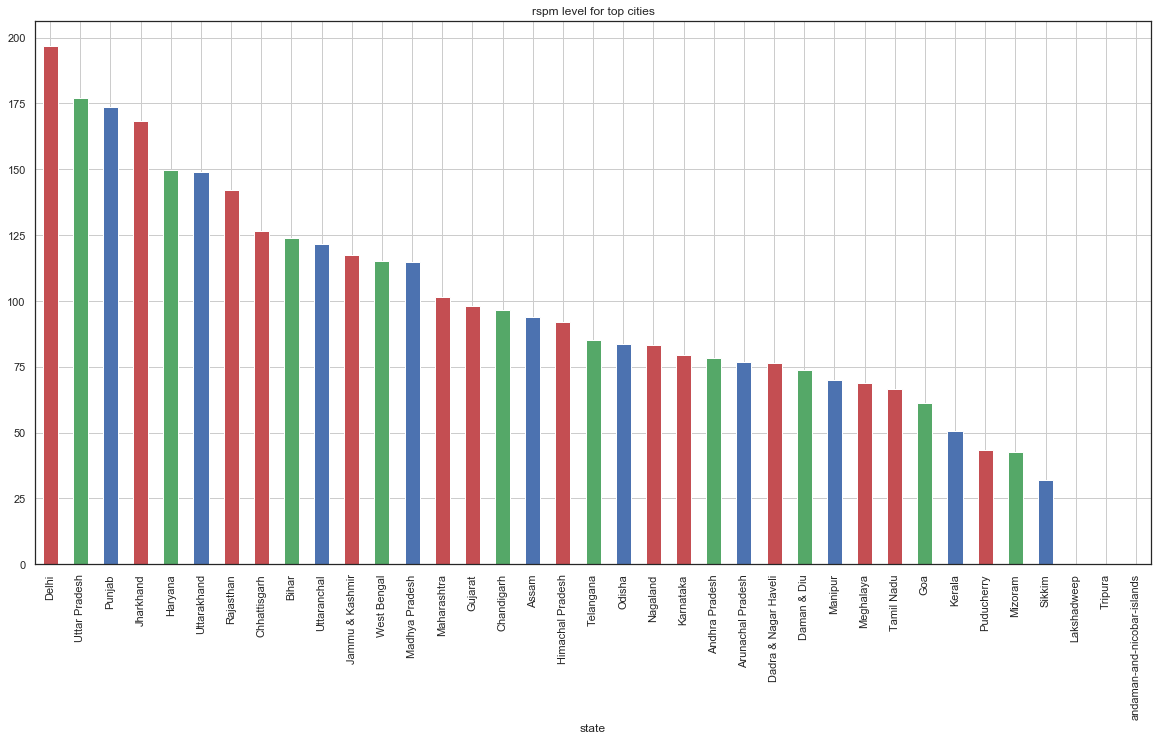

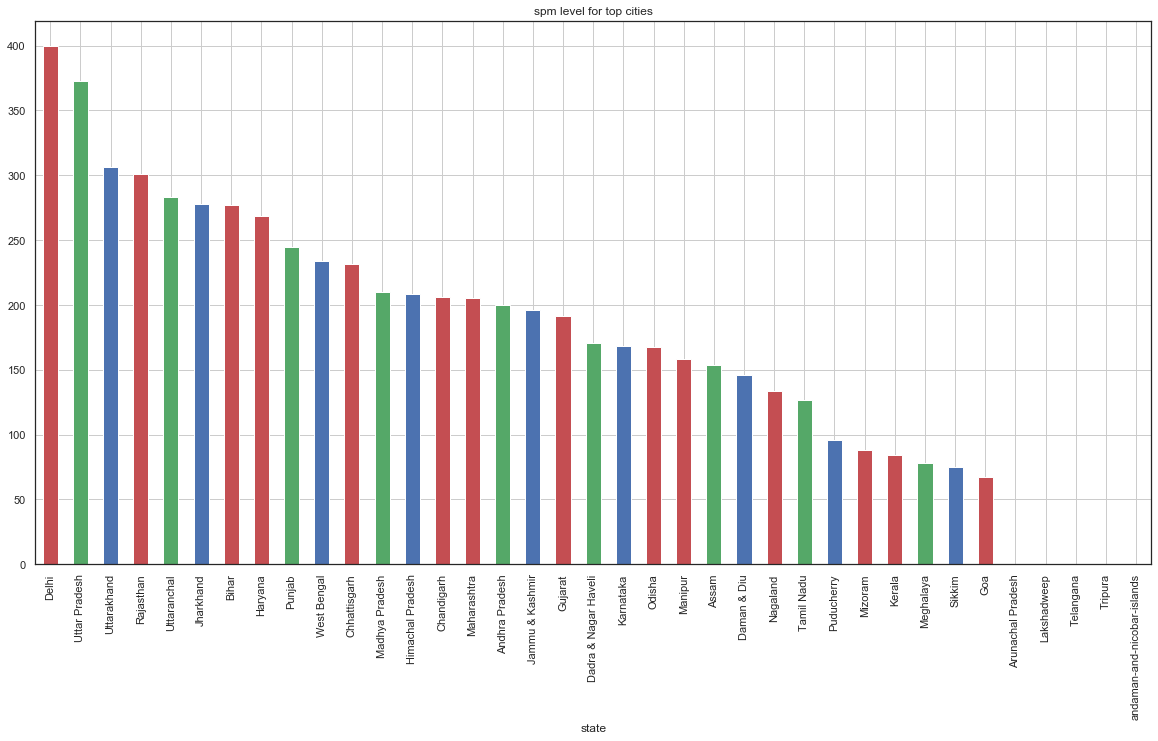

In [19]:
for col in pollutant_values:
    air_pollution_data.groupby('state').mean().sort_values(col, ascending=False)[col].plot(kind='bar', 
                                                      title=f"{col} level for top cities",color=['r', 'g', 'b', 'r', 'g', 'b', 'r'])
    plt.grid()
    plt.show()
 

In [20]:
air_pollition_data.isnull().sum()/air_pollition_data.shape[0]*100

NameError: name 'air_pollition_data' is not defined

In [ ]:
air_pollition_data.

In [ ]:
population_data = pd.read_csv("data/population_data.csv")

In [ ]:
population_data.head()

In [ ]:
second_population_data = pd.read_csv("data/city_town_type_population.csv")

In [ ]:
air_pollition_data['location'].str.lower()

In [ ]:
air_pollition_data.columns

In [ ]:
columns_to_drop = ['stn_code', 'agency','pm2_5']

In [ ]:
air_pollition_data = air_pollition_data.drop(columns_to_drop, axis=1)

In [ ]:
second_population_data.columns

In [ ]:
merge_df = air_pollition_data.merge(second_population_data[['Name of City', 'Population (2011)']], left_on='location', right_on='Name of City', how='left')

In [ ]:
merge_df['location'].isnull().sum()

In [ ]:
merge_df['location'].unique()

In [ ]:
import numpy as np

In [ ]:
merge_df['Name of City'].unique().tolist().apply(lambda x : str(x))

In [ ]:

merge_df[merge_df['Population (2011)'].isnull()]

In [ ]:
second_population_data['Name of City']

In [ ]:
urban_population_india = pd.read_csv("data/datafile.csv")

In [ ]:
urban_population_india['NameError']

In [ ]:
vehicle_data = pd.read_csv("data/city_vehicle_data.csv")

In [ ]:
vehicle_data.head()

In [ ]:
state_vehicle_data = pd.read_csv("data/state_moter_registration.csv")

In [ ]:
state_vehicle_data.head()

In [ ]:
state_vehicle_data['2001']

In [ ]:
sns.scatterplot(data=urban_population_india, x='Year ', y='Percent of Urban population to total population')

In [ ]:
sns.jointplot(x = "rspm", y='spm', data=df, size=5)

In [ ]:
sns.jointplot(x = "so2", y='no2', data=df, size=5)

In [ ]:

df.head()
df.info()
df.isnull().sum()


In [ ]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)


In [ ]:

df['agency'].value_counts()
# date format - mm/dd/yyyy
df['type'].value_counts()


In [ ]:
#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

In [ ]:

#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']


In [ ]:
#dataset after deleting the above columns
df.head()

In [ ]:

# 298 locations, 34 states

#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()


In [ ]:
######################################### do add threshold lines
#how many observations belong to each location
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

In [ ]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

In [ ]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

In [ ]:
# rspm = PM10
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')

In [ ]:
# spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

In [ ]:
# pm2_5
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')

In [ ]:

#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [ ]:
#Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

In [ ]:

# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

df.head()

In [ ]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

In [ ]:
    
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

In [ ]:
# bar plot of no2 vs location - desc order - first 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g')

In [ ]:
# bar plot of no2 vs location - desc order - last 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')

In [ ]:
# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y')

In [ ]:
# bar plot of no2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y')

In [ ]:
# rspm = PM10 - location wise - first 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')

In [ ]:
# rspm = PM10 - location wise - last 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'r')

In [ ]:

# pm2_5 vs location - all non null values
df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')

In [ ]:

# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(df.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

In [ ]:
# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})